Обработка страницы 133


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Метод isolate_dark_shades выполнен


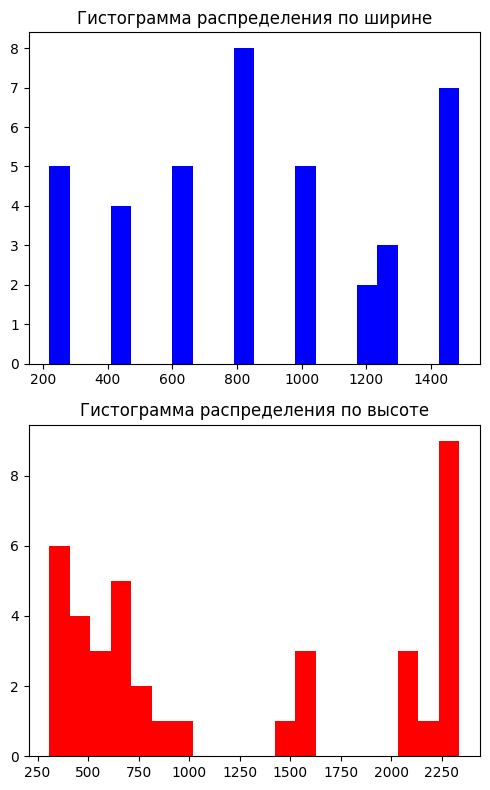

In [11]:
import pandas as pd
import easyocr 
import sys
import numpy as np
sys.path.append('C:/IDE/repository/liquid_vapor_database')
from src.table_gridlines import Gridlines
from src.pdf_image_extractor import PDFImageExtractor
from src.pdf_page_processor import PageImage
from src.page_data import PageData


PAGE_NUM = 133
data_path = f'C:/IDE/repository/liquid_vapor_database/data/Kogan_1.pdf'
work_folder_path = f'C:/IDE/repository/liquid_vapor_database/pdf_data/page_{PAGE_NUM}'
assets_folder_path = 'C:/IDE/repository/liquid_vapor_database/tests/assets'
img_path = f'{work_folder_path}/page_{PAGE_NUM}_processed.png'
extractor = PDFImageExtractor(data_path, work_folder_path)
page_image = PageImage(PAGE_NUM, extractor)
reader = easyocr.Reader(['ru', 'en'])
result = reader.readtext(img_path)
easyocr_df = pd.DataFrame(result, columns=['bbox','text','conf'])
detector = Gridlines(img_path, easyocr_df, debug=True)
page = PageData(easyocr_df)
page.df.to_csv(f'{assets_folder_path}/{PAGE_NUM}_df.csv', index=False)

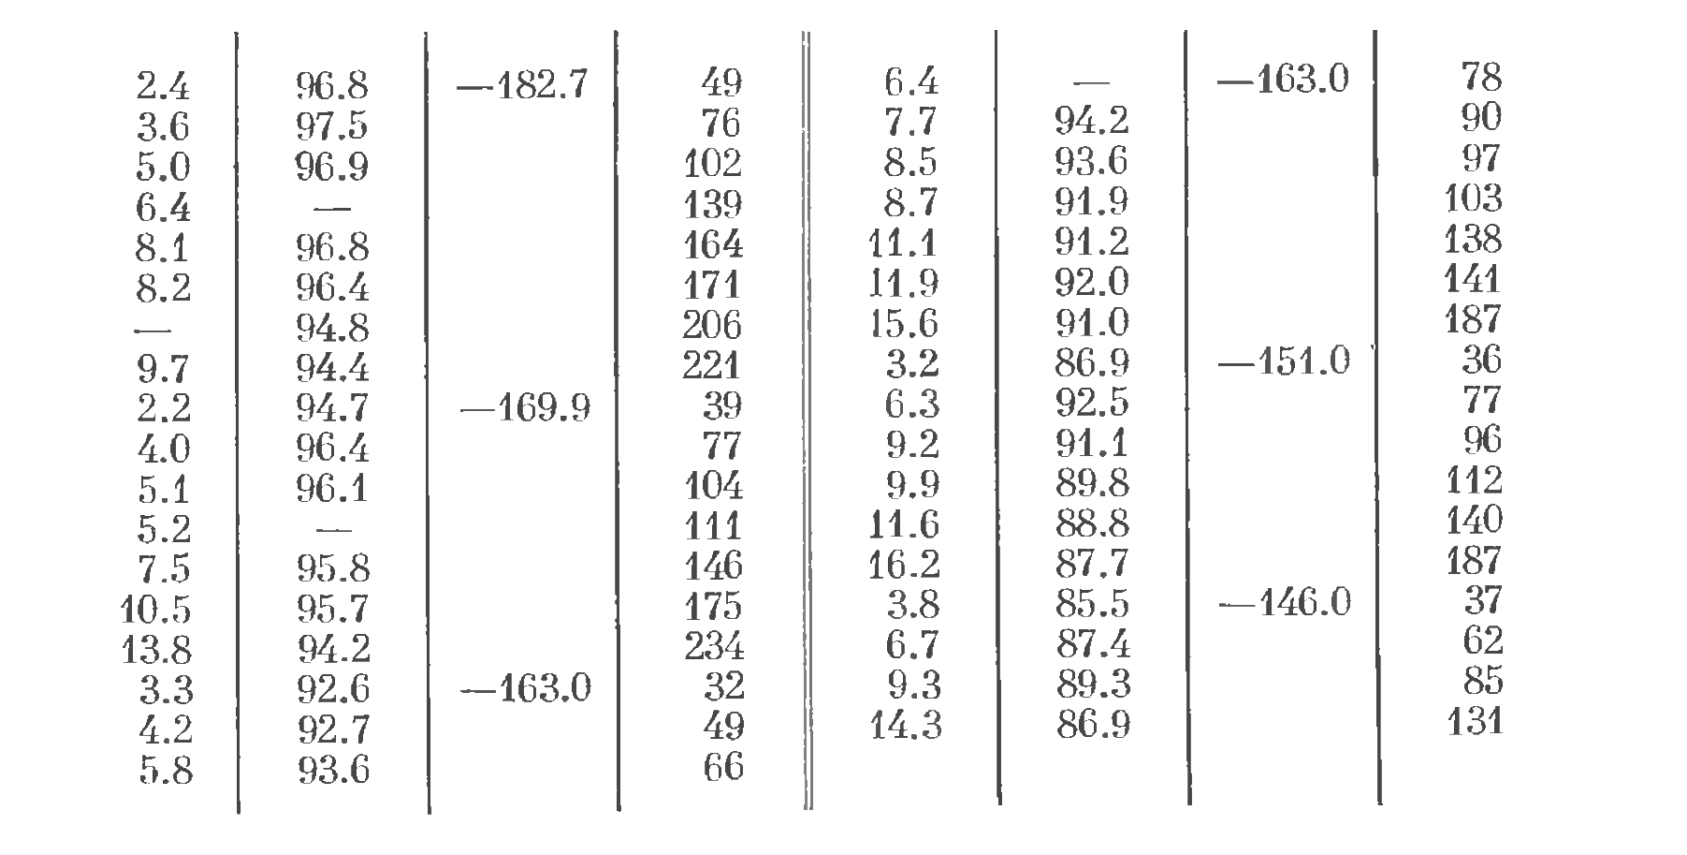

In [12]:
from src.page_data import PageData
import matplotlib.pyplot as plt
import cv2


page = PageData(easyocr_df)

temp_df = page.df.query("region == 'value' and table_number == 0"
              ).drop(['region', 'table_number', 'prev_region', 'next_region'], axis=1)

diff = page_image.max_height - page.max_y 
_min, _max = page.unscale_height_position(temp_df.index.min(), temp_df.index.max())

def adjust_min_max(_min, _max, bbox_mean):    
    if (_min_adjusted := _min - bbox_mean) < 0:
        _min_adjusted = 0
        
    _max_adjusted = (_max + bbox_mean)

    return _min_adjusted, _max_adjusted

adjusted_min, adjusted_max = adjust_min_max(
    _min, _max, page.data['bbox_height'].mean().astype('int'))


img = cv2.imread(img_path)

# Переключение цветовых каналов из BGR (формат OpenCV) в RGB (формат matplotlib).
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Обрезка изображения по высоте.
C = 0
cropped_img = img[adjusted_min - C:adjusted_max + C, :, :]

plt.figure(figsize=(7, 7), dpi=300)  
plt.imshow(cropped_img, interpolation='bilinear') 
plt.axis('off')
plt.show()

In [13]:
import os
import cv2


def adjust_min_max(_min, _max, bbox_mean):
    if (_min_adjusted := _min - bbox_mean) < 0:
        _min_adjusted = 0
        
    _max_adjusted = _max + bbox_mean

    return _min_adjusted, _max_adjusted

def crop_and_save_table_images(page, img_path, work_folder_path):
    # Создаем папку для сохранения, если она не существует
    if not os.path.exists(work_folder_path):
        os.makedirs(work_folder_path)
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Переключение цветовых каналов из BGR в RGB.

    for table_num in page.df['table_number'].unique():
        for region in ['metadata', 'value']:
            # Фильтрация данных для каждой таблицы и каждого региона
            temp_df = page.df.query(f"region == '{region}' and table_number == {table_num}")

            # Если нет данных для текущей таблицы и региона, пропускаем итерацию
            if temp_df.empty:
                continue
            
            _min, _max = page.unscale_height_position(temp_df.index.min(), temp_df.index.max())
            adjusted_min, adjusted_max = adjust_min_max(
                _min, _max, page.data['bbox_height'].mean().astype('int'))

            cropped_img = img[adjusted_min - C:adjusted_max + C, :, :]
            plt.imsave(os.path.join(work_folder_path, f'{region}_{table_num}.png'), cropped_img)


# Теперь вызовите функцию crop_and_save_table_images с соответствующими аргументами.
crop_and_save_table_images(page, img_path, work_folder_path)


In [23]:
img_path = 'C:/IDE/repository/liquid_vapor_database/pdf_data/page_133/value_0.png'

result = reader.readtext(img_path)
easyocr_df = pd.DataFrame(result, columns=['bbox','text','conf'])
page = PageData(easyocr_df)
page.df

,0,1,2,3,4,5,6,7,8,region,prev_region,next_region,table_number
0,[2.4],[96.8],[~182.7],[49],[],[],[_163.0],[78],[],metadata,metadata,metadata,0
1,[],[],[],[],[6.7],[],[],[],[],value,value,value,0
2,[3.6],[97.5],[],[76],[7],[94.2],[],[90],[],value,metadata,value,0
3,[5.0],[96.9],[],[102],[8.5],[93.6],[],[97],[],value,value,value,0
4,[],[],[],[],[8.7],[91.9],[],[103],[],value,value,value,0
5,[6.4],[],[],[139],[],[],[],[],[],value,value,value,0
6,[8.1],[96.8],[],[164],[11.1],[91.2],[],[138],[],value,value,value,0
7,[8.2],[96.4],[],[171],[11.9],[92.0],[],[141],[],value,value,metadata,0
8,[],[],[],[],[],[],[],[187],[],value,value,value,0
9,[],[94.8],[],[206],[15.6],[91.0],[],[],[],value,metadata,value,0


In [22]:
import pytesseract

def extract_text_from_images(img_path, custom_config=r'--oem 3 --psm 6'):
    extracted_text_path = work_folder_path + '/text.txt'
    with open(extracted_text_path, 'w', encoding='utf-8') as text_file:
        if os.path.exists(img_path):
            # Адаптивная пороговая обработка и удаление "клякс"
            img = cv2.imread(img_path) 
            # OCR и сохранение текста
            text = pytesseract.image_to_string(img, config=custom_config, lang='rus+eng')
            text_file.write(f'--- Страница ---\n{text}\n')
            text = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT, config=custom_config, lang='rus+eng')
            

extract_text_from_images(img_path)

In [ ]:
def extract_text_from_images(self, custom_config=r'--oem 3 --psm 6 -c preserve_interword_spaces=1'):
        extracted_text_path = os.path.join(self.extractor.images_folder, f'{self.page_num}_text.txt')
        with open(extracted_text_path, 'w', encoding='utf-8') as text_file:                     
            img_path = os.path.join(self.extractor.images_folder, f'page_{self.page_num}_processed.png')
            if os.path.exists(img_path):
                # Адаптивная пороговая обработка и удаление "клякс"
                img = cv2.imread(img_path)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)                

                # OCR и сохранение текста
                text = pytesseract.image_to_string(img_path, config=custom_config, lang='rus+eng')
                text_file.write(f'--- Страница {self.page_num} ---\n{text}\n')
                self.text = pytesseract.image_to_data(img_path, output_type=pytesseract.Output.DICT, config=custom_config, lang='rus+eng')

In [14]:
diff = page_image.max_height - page.max_y 
_min, _max = page.unscale_height_position(temp_df.index.min(), temp_df.index.max())

def adjust_min_max(_min, _max, bbox_mean):    
    if (_min_adjusted := _min - bbox_mean) < 0:
        _min_adjusted = 0
        
    _max_adjusted = (_max + bbox_mean)

    return _min_adjusted, _max_adjusted

adjusted_min, adjusted_max = adjust_min_max(
    _min, _max, page.data['bbox_height'].mean().astype('int'))

print("Adjusted Min:", adjusted_min)
print("Adjusted Max:", adjusted_max)

Adjusted Min: 1922
Adjusted Max: 2489


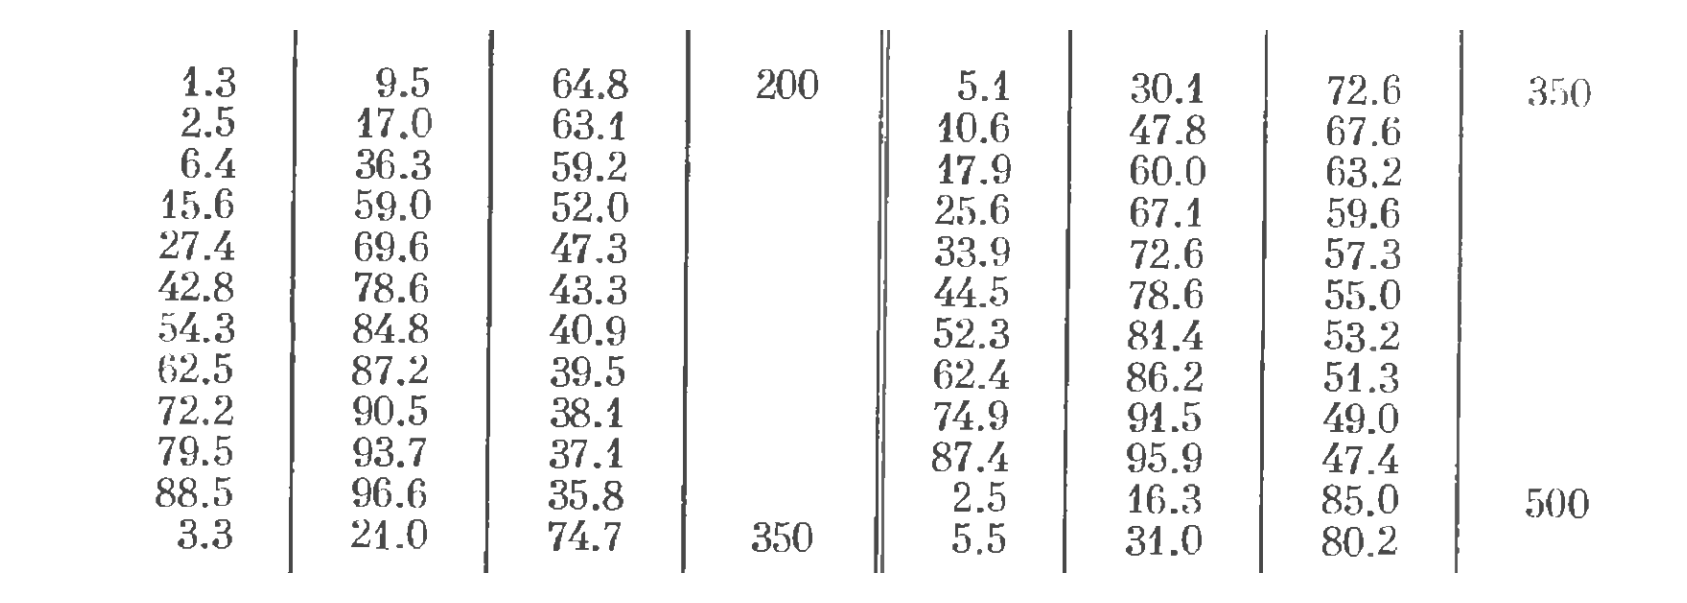

In [15]:
import matplotlib.pyplot as plt
import cv2


img = cv2.imread(img_path)

# Переключение цветовых каналов из BGR (формат OpenCV) в RGB (формат matplotlib).
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Обрезка изображения по высоте.
C = 0
cropped_img = img[adjusted_min - C:adjusted_max + C, :, :]

plt.figure(figsize=(7, 7), dpi=300)  
plt.imshow(cropped_img, interpolation='bilinear') 
plt.axis('off')
plt.show()

In [3]:
#page_image.min_width
page.unscale_height_position(temp_df.index.min(), temp_df.index.max())

(1704, 1960)

In [16]:
def crop_and_save_image(image_path, rectangles, save_dir):
    # Загрузка изображения
    img = cv2.imread(image_path)
    if img is None:
        print("Ошибка загрузки изображения. Проверьте путь к изображению.")
        return

    # Обрезка и сохранение каждого прямоугольника
    for i, (x1, y1, x2, y2) in enumerate(rectangles):
        # Обрезка изображения согласно координатам
        crop_img = img[y1:y2, x1:x2]

        # Сохранение обрезанного изображения
        save_path = f"{save_dir}/cropped_{i+1}.png"
        cv2.imwrite(save_path, crop_img)
        print(f"Сохранено: {save_path}")

save_dir = 'C:/IDE/repository/liquid_vapor_database/pdf_data/page_133'       
crop_and_save_image(img_path, blue_coords, save_dir)

Сохранено: C:/IDE/repository/liquid_vapor_database/pdf_data/page_133/cropped_1.png
Сохранено: C:/IDE/repository/liquid_vapor_database/pdf_data/page_133/cropped_2.png
Сохранено: C:/IDE/repository/liquid_vapor_database/pdf_data/page_133/cropped_3.png


In [16]:
img_path

'C:/IDE/repository/liquid_vapor_database/pdf_data/page_170/page_170_processed.png'

In [10]:
import pandas as pd

# easyocr_df - предположим, что это ваш DataFrame с результатами OCR

# Пересчитать координаты для более простого доступа
easyocr_df['x_min'] = easyocr_df['bbox'].apply(lambda bbox: bbox[0][0])
easyocr_df['y_min'] = easyocr_df['bbox'].apply(lambda bbox: bbox[0][1])
easyocr_df['x_max'] = easyocr_df['bbox'].apply(lambda bbox: bbox[2][0])
easyocr_df['y_max'] = easyocr_df['bbox'].apply(lambda bbox: bbox[2][1])

# Сортировка по Y, затем по X координатам
sorted_df = easyocr_df.sort_values(by=['y_min', 'x_min'])

# Группировка текста по строкам с учетом допуска в Y координатах
grouped_lines = {}
line_threshold = 10  # допуск в пикселях для Y координаты, чтобы считать тексты одной строки

for _, row in sorted_df.iterrows():
    added = False
    for y in grouped_lines:
        if abs(y - row['y_min']) < line_threshold:
            grouped_lines[y].append((row['x_min'], row['text']))
            added = True
            break
            
    if not added:
        grouped_lines[row['y_min']] = [(row['x_min'], row['text'])]

# Формирование итогового текста с пробелами, соответствующими расстоянию между словами
output_text = []
for y in sorted(grouped_lines.keys()):
    texts = sorted(grouped_lines[y], key=lambda x: x[0])
    line_text = ""
    last_x_end = 0
    for x, text in texts:
        space_count = max((x - last_x_end) // 20 - len(text), 0)  # количество пробелов между словами
        line_text += ' ' * space_count + text
        last_x_end = x + len(text) * 20  # обновление последнего x конца с учетом добавленного текста
    output_text.append(line_text)

# Сохраняем строки в текстовый файл
with open("output_text.txt", "w", encoding="utf-8") as file:
    for line in output_text:
        file.write(line + "\n")


TypeError: can't multiply sequence by non-int of type 'float'

In [15]:
import cv2
import numpy as np

# Замените это путем к вашему изображению
image_path = 'C:/IDE/repository/liquid_vapor_database/pdf_data/page_133/page_133_processed.png'

# Загрузите изображение
img = cv2.imread(image_path)

# Предполагается, что easyocr_df - это ваш DataFrame
for index, row in easyocr_df.iterrows():
    bbox = row['bbox']
    text = row['text']

    # Находим координаты для текста: левый верхний угол и нижний правый
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    br = (int(br[0]), int(br[1]))

    # Установите параметры для текста: шрифт, размер и т.д.
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_color = (0, 0, 255) # красный цвет
    font_thickness = 1

    # Нанесите текст на изображение
    img = cv2.putText(img, text, tl, font, font_scale, font_color, font_thickness, cv2.LINE_AA)

# Сохранить результат в файл
cv2.imwrite('C:/IDE/repository/liquid_vapor_database/pdf_data/page_133/page_133_processed_easyocr.png', img)

True

In [17]:
easyocr_df['text'].to_list()

['Ni',
 '1(',
 'ВОДОРОД_МЕТАН',
 '[258]',
 'H2CH4',
 '?',
 '9',
 't',
 'Р, ата',
 'T',
 'Р , ата',
 '2.4',
 '96.8',
 '-182.7',
 '49',
 '6.4',
 '-163.0',
 '78',
 '3.6',
 '97.5',
 '76',
 '7.7',
 '94.2',
 '90',
 '5.0',
 '96.9',
 '102',
 '8.5',
 '93.6',
 '97',
 '6.4',
 '139',
 '8.7',
 '91.9',
 '103',
 '8.1',
 '96.8',
 '164',
 '11.1',
 '91.2',
 '138',
 '8.2',
 '96.4',
 '171',
 '11.9',
 '92.0',
 '141',
 '94.8',
 '206',
 '15.6',
 '91.0',
 '187',
 '9.7',
 '94,4',
 '221',
 '3.2',
 '86.9',
 '_151.0',
 '36',
 '94.7',
 '_169.9',
 '39',
 '6.3',
 '92.5',
 '77',
 '2.2',
 '96.4',
 '77',
 '9.2',
 '91.1',
 '96',
 '5.1',
 '96.1',
 '104',
 '9.9',
 '89.8',
 '112',
 '111',
 '11.6',
 '88.8',
 '140',
 '5.2',
 '7',
 '95.8',
 '146',
 '16.2',
 '87,7',
 '187',
 '10.5',
 '95.7',
 '175',
 '3.8',
 '85.5',
 '~146.0',
 '37',
 '13.8',
 '94.2',
 '234',
 '6.7',
 '87.4',
 '62',
 '3.3',
 '92.6',
 '_163.0',
 '32',
 '9.3',
 '89.3',
 '85',
 '4.2',
 '92.7',
 '49',
 '14.3',
 '86.9',
 '131',
 '5.8',
 '93.6',
 '66',
 'Ni',
 '11',